# Air BnB NYC Data Analysis: Where you will prefer to stay if you visit NYC?

#Project: Air BNB NYC Data Analysis
#Date: 10/10/2019
#Contributers: 
1.Grettel Canepari
2.Katherine Lee
3.Mandar Gogate
4.Petra Alex
5.Preet Puri
6.Sweta Shekhar

# Keep source file and config file at same location where your ipynb file is

In [1]:
import gmaps
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests 
# Google developer API key
from config import gkey

# Access maps with unique API key
gmaps.configure(gkey)

In [2]:
file_ny_air_bnb = "C:/Users/KXL0EN5/AB_NYC_2019.csv"

In [3]:
#read csv file and load into Data Frame
df_ny_air_bnb = pd.read_csv(file_ny_air_bnb)

In [4]:
#Print the dataframe
df_ny_air_bnb.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355


In [5]:
df_ny_air_bnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

As metadata above shows, there are few nulls in our data. However not all null records are useless,
e.g. last_review, reviews_per_month can have null values, but remaining data is needed. 
Considering our goal, we can not have null for name or host_name, because we can not know who the host is or name of the location is. We will drop all rows where we will find nulls at host_name or name columns

In [6]:
df_ny_air_bnb.loc[df_ny_air_bnb["reviews_per_month"].isnull(),["reviews_per_month"]]=0
df_ny_air_bnb.loc[df_ny_air_bnb["last_review"].isnull(),["last_review"]]="1900-01-01"
df_ny_air_bnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       48895 non-null object
reviews_per_month                 48895 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

Now we can drop rows where we have null values in name or host_name column

In [7]:
df_ny_air_bnb = df_ny_air_bnb.dropna(how='any',axis=0) 
df_ny_air_bnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48858 entries, 0 to 48894
Data columns (total 16 columns):
id                                48858 non-null int64
name                              48858 non-null object
host_id                           48858 non-null int64
host_name                         48858 non-null object
neighbourhood_group               48858 non-null object
neighbourhood                     48858 non-null object
latitude                          48858 non-null float64
longitude                         48858 non-null float64
room_type                         48858 non-null object
price                             48858 non-null int64
minimum_nights                    48858 non-null int64
number_of_reviews                 48858 non-null int64
last_review                       48858 non-null object
reviews_per_month                 48858 non-null float64
calculated_host_listings_count    48858 non-null int64
availability_365                  48858 non-null int64

# What all different types of rooms are available? and how many are they?

In [8]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.transpose.html
#Considered Host_ID and not ID, as Host_ID is a correst way to count accomodations
df_roomTypes = pd.DataFrame([df_ny_air_bnb.groupby("room_type")["host_id"].count()]).T

In [9]:
 pd.DataFrame([df_ny_air_bnb.groupby("room_type")["host_id"].count()]).T

,host_id
room_type,
Entire home/apt,25393
Private room,22306
Shared room,1159


# What is an Average Cost per room by each room type?

In [10]:
df_roomTypes["AveragePrice"] = pd.DataFrame([df_ny_air_bnb.groupby("room_type")["price"].mean()]).T

In [11]:
pd.DataFrame([df_ny_air_bnb.groupby("room_type")["price"].mean()]).T

,price
room_type,
Entire home/apt,211.806994
Private room,89.794360
Shared room,70.075928


# Total No. Of Accomodations and Average Price by Room Types

In [12]:
df_roomTypes

,host_id,AveragePrice
room_type,,
Entire home/apt,25393,211.806994
Private room,22306,89.794360
Shared room,1159,70.075928


# As data shows, prices are ordered by Entire Home, Private Room & Shared Room

Text(0.5, 1.0, 'Average Price By Room Type')

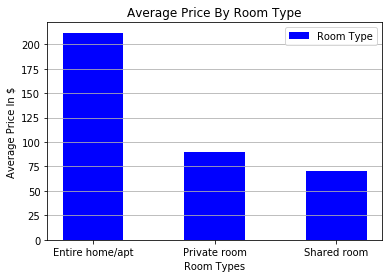

In [13]:
plt.bar(df_roomTypes.index, df_roomTypes["AveragePrice"],
        color='b', align="center", width=0.5, label="Room Type")
plt.grid(axis='y')
plt.ylabel("Average Price In $")
plt.xlabel("Room Types")
plt.legend(loc="upper right")
plt.title("Average Price By Room Type")

# How is the room count by each neighbourhood group & room type?

In [14]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.transpose.html
#https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html
pd.DataFrame([df_ny_air_bnb.groupby(["room_type","neighbourhood_group"])["host_id"].nunique()]).T.unstack(1).round(2)#.sort_values(by="Entire home/apt", axis=1, ascending=False)

host_id                                        
neighbourhood_group   Bronx Brooklyn Manhattan Queens Staten Island
room_type                                                          
Entire home/apt         323     8644     10562   1849           153
Private room            459     7735      6224   2201           113
Shared room              42      233       346    127             6

# So how much % of Air BnB Accomodations we have by each neighbourhood group?

In [15]:
var_total_hosts = df_ny_air_bnb["host_id"].nunique()

In [16]:
#https://stackoverflow.com/questions/49153253/pandas-rounding-when-converting-float-to-integer
df_counts_by_neighbour_group = pd.DataFrame([df_ny_air_bnb.groupby(["room_type","neighbourhood_group"])["host_id"].nunique()/var_total_hosts*100]).T.unstack(1).round(2)#.sort_values(by="Entire home/apt", axis=1, ascending=False)#.astype(str)+"%"

In [17]:
#https://stackoverflow.com/questions/21752399/pandas-dataframe-total-row
df_counts_by_neighbour_group.loc["Total",:] = df_counts_by_neighbour_group.sum(axis=0)
# df_counts_by_neighbour_group.loc[:,"Total"] = df_counts_by_neighbour_group.sum(axis=1)
df_counts_by_neighbour_group
df_counts_by_neighbour_group.round(2).astype(str)+"%"
#Note -- here Sum of Row Total % is more than 100%.. this is because of rounding

host_id                                         
neighbourhood_group   Bronx Brooklyn Manhattan  Queens Staten Island
room_type                                                           
Entire home/apt       0.86%    23.1%    28.22%   4.94%         0.41%
Private room          1.23%   20.67%    16.63%   5.88%          0.3%
Shared room           0.11%    0.62%     0.92%   0.34%         0.02%
Total                  2.2%   44.39%    45.77%  11.16%         0.73%

# As data shows, more than 85% of accomodations are in either Manhattan or at Brooklyn

In [18]:
pie_arch = []
pie_arch_value = []

for row in (df_counts_by_neighbour_group.loc["Total",:]):
    pie_arch_value.append((row))
    
for index1, index2 in df_counts_by_neighbour_group.loc["Total",:].index:
    pie_arch.append(index2)
    
colors = ["yellow", "green", "lightblue", "orange"]
# pie_arch_value

([<matplotlib.patches.Wedge at 0xa3260f0>,
 [Text(-1.1420063231987836, 1.190933061835969, 'Bronx'),
  Text(-1.364007243276508, -0.9284310638325398, 'Brooklyn'),
  Text(1.6253627244673263, 0.2840704382933055, 'Manhattan'),
  Text(-0.5156276888769752, 1.5673634187588372, 'Queens'),
  Text(-1.0325390170860538, 1.2869977382244955, 'Staten Island')],
 [Text(-0.6229125399266091, 0.6495998519105284, '2.11%'),
  Text(-0.7440039508780951, -0.506416943908658, '42.58%'),
  Text(0.8865614860730869, 0.15494751179634844, '43.90%'),
  Text(-0.28125146666016826, 0.8549255011411837, '10.71%'),
  Text(-0.5632031002287564, 0.70199876630427, '0.70%')])

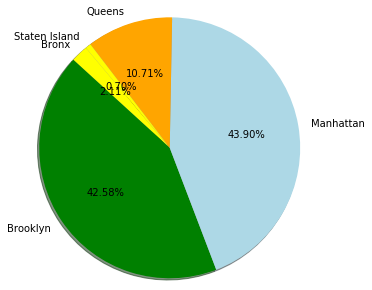

In [19]:
plt.pie(pie_arch_value, labels = pie_arch, colors = colors, autopct="%.2f%%", shadow=True, startangle=130, radius=1.5)

# So, what are average accomodation prices by Neighbourhood Group?

In [20]:
df_avg_price_by_neighbour_group = pd.DataFrame([df_ny_air_bnb.groupby(["room_type","neighbourhood_group"])["price"].mean()]).T.unstack(1).round(2)#.sort_values(by="Entire home/apt", axis=1, ascending=False)#.astype(str)+"%"

In [21]:
df_avg_price_by_neighbour_group.loc["Total",:] = df_avg_price_by_neighbour_group.sum(axis=0)
df_avg_price_by_neighbour_group

price                                         
neighbourhood_group   Bronx Brooklyn Manhattan  Queens Staten Island
room_type                                                           
Entire home/apt      127.65   178.36    249.24  147.05        173.85
Private room          66.79    76.51    116.81   71.78         62.29
Shared room           58.61    50.53     88.98   69.02         57.44
Total                253.05   305.40    455.03  287.85        293.58

In [22]:
x_axis = []
for index1, index2 in df_avg_price_by_neighbour_group.iloc[3,0:5].index:
    x_axis.append(index2)
#     print(index2)

In [23]:
y_entire_home = []
for val in (df_avg_price_by_neighbour_group.iloc[0,0:5]):
    y_entire_home.append(val)

y_entire_home = np.array(y_entire_home)
    
y_private_room = []
for val in (df_avg_price_by_neighbour_group.iloc[1,0:5]):
    y_private_room.append(val)
    
y_private_room = np.array(y_private_room)

y_shared_room = []
for val in (df_avg_price_by_neighbour_group.iloc[2,0:5]):
    y_shared_room.append(val)
 
y_shared_room = np.array(y_shared_room)

In [24]:
ind = [x for x, _ in enumerate(x_axis)]

# As data shows, Average Accomodation prices for Entire Home in Manhattan is almost double than any other heighbourhood group

Text(0.5, 1.0, 'Average Price By Neighbourhood Group')

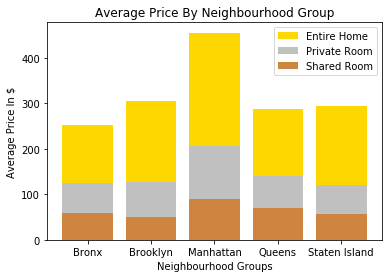

In [25]:
# http://benalexkeen.com/bar-charts-in-matplotlib/
plt.bar(ind, y_entire_home, width=0.8, label='Entire Home', color='gold', bottom=y_private_room+y_shared_room)
plt.bar(ind, y_private_room, width=0.8, label='Private Room', color='silver', bottom=y_shared_room)
plt.bar(ind, y_shared_room, width=0.8, label='Shared Room', color='#CD853F')
plt.xticks(ind, x_axis)
plt.ylabel("Average Price In $")
plt.xlabel("Neighbourhood Groups")
plt.legend(loc="upper right")
plt.title("Average Price By Neighbourhood Group")

# So, how about the neighbourhoods in Manhattan or Brooklyn?

In [26]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.transpose.html
#https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html
df_neighbourhood_in_Manhattan = pd.DataFrame(df_ny_air_bnb.loc[df_ny_air_bnb["neighbourhood_group"]=="Manhattan",:].groupby("neighbourhood")["host_id"].nunique()).sort_values(by="host_id", axis=0, ascending=False).round(2)
df_neighbourhood_in_Manhattan_Temp = pd.DataFrame(df_ny_air_bnb.loc[df_ny_air_bnb["neighbourhood_group"]=="Manhattan",:].groupby("neighbourhood")["price"].mean())

In [27]:
#https://www.datacamp.com/community/tutorials/joining-dataframes-pandas
df_neighbourhood_in_Manhattan_count_price = pd.merge(df_neighbourhood_in_Manhattan, df_neighbourhood_in_Manhattan_Temp, on="neighbourhood")

In [28]:
df_neighbourhood_in_Manhattan_count_price = df_neighbourhood_in_Manhattan_count_price.reset_index()
df_neighbourhood_in_Manhattan_count_price

,neighbourhood,host_id,price
0,Harlem,2113,118.952542
1,East Village,1619,186.075594
2,Upper West Side,1587,210.990350
3,Upper East Side,1408,188.872565
4,Hell's Kitchen,1360,204.931934
5,Midtown,980,282.719094
6,Chelsea,900,249.765288
7,East Harlem,894,133.193548
8,Lower East Side,772,186.312843
9,Washington Heights,761,89.665924


# As data shows, in Manhattan - most of the accomodations are concentrated in 10 neighbourhoods

No handles with labels found to put in legend.


Text(0.5, 1.0, 'No. of AirBnB Accomodations by Neighbourhood in Manhattan')

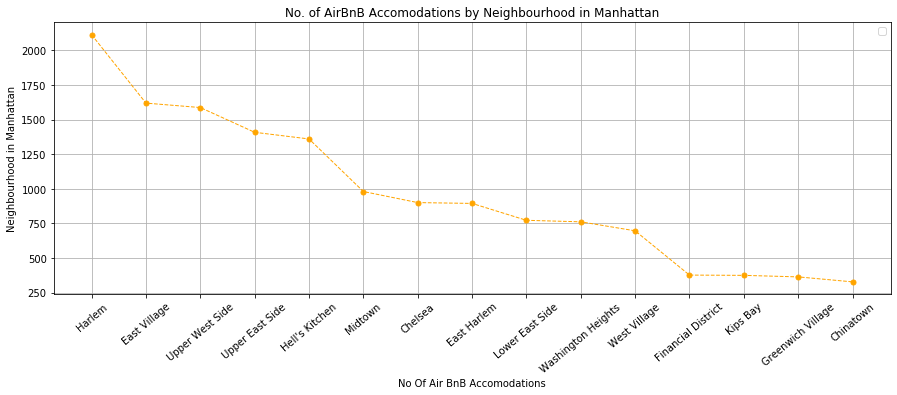

In [29]:
plt.figure(figsize=(15,5))
ax = plt.plot(df_neighbourhood_in_Manhattan_count_price.iloc[0:15:,0]
            , df_neighbourhood_in_Manhattan_count_price.iloc[0:15:,1]
         ,color='orange', marker='o', linestyle='dashed', linewidth=1, markersize=5)
plt.xticks(rotation=40)
plt.grid()
plt.ylabel("Neighbourhood in Manhattan")
plt.xlabel("No Of Air BnB Accomodations")
plt.legend(loc="upper right")
plt.title("No. of AirBnB Accomodations by Neighbourhood in Manhattan")

# In Brooklyn as well, most of the accomodations are concentrated in 10 neighbourhoods

In [30]:
df_neighbourhood_in_Brooklyn = pd.DataFrame(df_ny_air_bnb.loc[df_ny_air_bnb["neighbourhood_group"]=="Brooklyn",:].groupby("neighbourhood")["host_id"].nunique()).sort_values(by="host_id", axis=0, ascending=False).round(2)
df_neighbourhood_in_Brooklyn_Temp = pd.DataFrame(df_ny_air_bnb.loc[df_ny_air_bnb["neighbourhood_group"]=="Brooklyn",:].groupby("neighbourhood")["price"].mean())

In [31]:
df_neighbourhood_in_Brooklyn_count_price = pd.merge(df_neighbourhood_in_Brooklyn, df_neighbourhood_in_Brooklyn_Temp, on="neighbourhood")

In [32]:
df_neighbourhood_in_Brooklyn_count_price = df_neighbourhood_in_Brooklyn_count_price.reset_index()
df_neighbourhood_in_Brooklyn_count_price

,neighbourhood,host_id,price
0,Williamsburg,3369,143.826142
1,Bedford-Stuyvesant,2779,107.688392
2,Bushwick,1892,84.815597
3,Crown Heights,1298,112.520154
4,Greenpoint,875,144.858041
5,Flatbush,519,92.260097
6,Clinton Hill,492,181.893357
7,Park Slope,462,176.312253
8,Prospect-Lefferts Gardens,443,110.401869
9,Fort Greene,406,151.374233


No handles with labels found to put in legend.


Text(0.5, 1.0, 'No. of AirBnB Accomodations by Neighbourhood in Brooklyn')

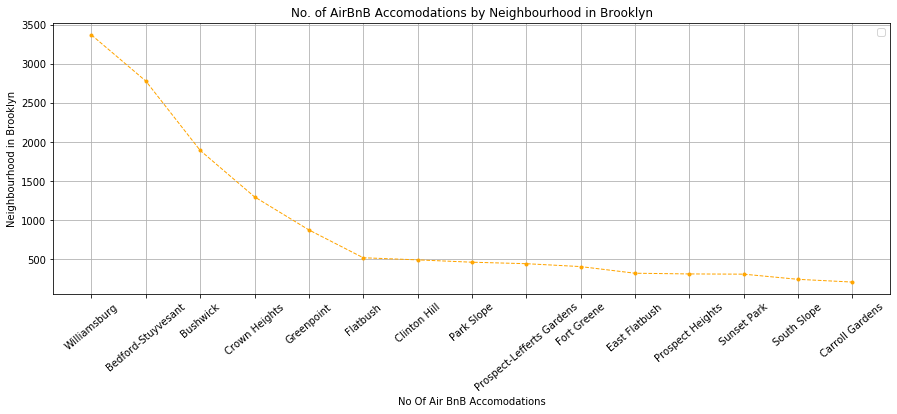

In [33]:
plt.figure(figsize=(15,5))
ax = plt.plot(df_neighbourhood_in_Brooklyn_count_price.iloc[0:15:,0]
            , df_neighbourhood_in_Brooklyn_count_price.iloc[0:15:,1]
         ,color='orange', marker='o', linestyle='dashed', linewidth=1, markersize=3)
plt.xticks(rotation=40)
plt.grid()
plt.ylabel("Neighbourhood in Brooklyn")
plt.xlabel("No Of Air BnB Accomodations")
plt.legend(loc="upper right")
plt.title("No. of AirBnB Accomodations by Neighbourhood in Brooklyn")

In [60]:
select_neighbourhood_group = input("Where do you prefer to Stay? Bronx, Brooklyn, Manhattan, Queens, or Staten Island")
if select_neighbourhood_group not in ["Bronx", "Brooklyn", "Manhattan", "Queens", "Staten Island"]:
    print("You have entered wrong choice")

Where do you prefer to Stay? Bronx, Brooklyn, Manhattan, Queens, or Staten IslandManhattan


In [61]:
select_price = input("Are you price conscious? Yes or No")
if select_price not in ["Yes", "No"]:
    print("You have entered wrong choice")

Are you price conscious? Yes or NoNo


In [62]:
my_order = True if select_price == "Yes" else False
my_order

False

In [63]:
df_selected_nh = df_ny_air_bnb.loc[df_ny_air_bnb["neighbourhood_group"]==select_neighbourhood_group,:]
df_google_map = df_selected_nh.sort_values(by="price", axis=0, ascending=my_order).head(4).loc[:,["name","latitude","longitude","host_name","neighbourhood","room_type","price","neighbourhood_group"]]
df_google_map

,name,latitude,longitude,host_name,neighbourhood,room_type,price,neighbourhood_group
29238,1-BR Lincoln Center,40.77213,-73.98665,Jelena,Upper West Side,Entire home/apt,10000,Manhattan
40433,2br - The Heart of NYC: Manhattans Lower East ...,40.71980,-73.98566,Matt,Lower East Side,Entire home/apt,9999,Manhattan
12342,"Quiet, Clean, Lit @ LES & Chinatown",40.71355,-73.98507,Amy,Lower East Side,Private room,9999,Manhattan
6530,Spanish Harlem Apt,40.79264,-73.93898,Olson,East Harlem,Entire home/apt,9999,Manhattan


In [64]:
coordinates = []
for index, row in df_google_map.iterrows():    
    coordinates.append({
        "name": row["name"],
        "host_name": row["host_name"],
        "room_type": row["room_type"],
        "price": row["price"],
        "neighbourhood": row["neighbourhood"],
        "neighbourhood_group": row["neighbourhood_group"],
        "location": (row["latitude"], row["longitude"])
    })    
airbnb_locations = [loc["location"] for loc in coordinates]
info_box_template = """
<dl>
<dt>Name</dt>
<dd>{name}</dd>
<dt>host_name</dt>
<dd>{host_name}</dd>
<dt>room_type</dt>
<dd>{room_type}</dd>
<dt>price</dt>
<dd>{price}</dd>
<dt>neighbourhood</dt>
<dd>{neighbourhood}</dd>
<dt>neighbourhood_group</dt>
<dd>{neighbourhood_group}</dd>
</dl>
"""
airbnb_info = [info_box_template.format(**loc) for loc in coordinates]
# coordinates

In [65]:
# Store latitude and longitude in locations
# Customize the size of the figure
figure_layout = {
   'width': '900px',
   'height': '500px',
   'border': '1px solid black',
   'padding': '1px',
   'margin': '0 auto 0 auto'
}
# fig = gmaps.figure(layout=figure_layout, center=(40.711507, -74.013357), zoom_level=12)
fig = gmaps.figure(layout=figure_layout, center=airbnb_locations[0], zoom_level=12)


In [66]:
# https://jupyter-gmaps.readthedocs.io/en/latest/api.html
markers = gmaps.marker_layer(airbnb_locations, info_box_content=airbnb_info)

# Add the layer to the map
fig.add_layer(markers)


In [67]:
fig

Figure(layout=FigureLayout(border='1px solid black', height='500px', margin='0 auto 0 auto', padding='1px', wi…

# To understand why Manhattan or Brooklyn is good to stay.. we fetch corresponding zip using Lat & Lon, dump that in csv and using vlookup created new xls file. 

# Using Tablau or Excel, we can see the output

Since there are duplicate Lat & Lon exists in dataset, we need to remove duplicates before we call google api to get zip

In [58]:
#sample are restricted to 3 since it cost money
sample_df= df_ny_air_bnb.sample(n=3).loc[:,["latitude","longitude"]].drop_duplicates(subset=None, keep='first', inplace=False)
sample_df= sample_df.reset_index(drop=True)
sample_df

,latitude,longitude
0,40.79598,-73.94288
1,40.74921,-73.99273
2,40.75394,-73.80538


In [59]:
postal_code = "postal_code"
zip_code= []

base_url= "https://maps.googleapis.com/maps/api/geocode/json"


for i,j in sample_df.iterrows():
    query=f"{base_url}?latlng={j.latitude},{j.longitude}&result_type={postal_code}&key={gkey}"
    #print(query)
    response = requests.get(query).json()
    try:
         zip_code.append({"zip":response["results"][0]["address_components"][0]["long_name"],
                          "lat":j.latitude,
                          "lon":j.longitude})
    except:
            print("not found") 
            
df_zip_lan_lon = pd.DataFrame(zip_code)
df_zip_lan_lon.to_csv("zip_code_lat_lon_lookup.csv")
df_zip_lan_lon

,lat,lon,zip
0,40.79598,-73.94288,10029
1,40.74921,-73.99273,10001
2,40.75394,-73.80538,11358
